In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
%matplotlib notebook


In [2]:
# 100 trials on same set of 2 frames (sensor noise re-applied for each trial)

#Spherical ICET
# fn1 = "MC_results/s1_spherical_ICET_estimates.npy" #MC?? 
# fn2 = "MC_results/s1_spherical_ICET_pred_stds.npy" #MC??
# Ground truth = [0.5, 0., 0., 0.0, 0.0, -0.05]
fn1 = "MC_results/traj1_spherical_ICET_estimates.npy" 
fn2 = "MC_results/traj1_spherical_ICET_pred_stds.npy"

#Cart ICET (w/ GP)
# fn1 = "MC_results/traj1_cart_ICET_estimates_no_GP.npy" 
# fn2 = "MC_results/traj1_cart_ICET_pred_stds_no_GP.npy"

#Cart ICET (NO GP)


est = np.load(fn1)
pred_stds = np.load(fn2)
# print(est)

# print(np.mean(est, axis = 0))

# print(np.mean(pred_stds, axis = 0)[:3])
# print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))
# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

# MSE = np.mean((est - np.array([0.5, 0, 0, 0, 0, -0.05]))**2, axis = 0)
err = (est - np.array([0.5, 0, 0, 0, 0, -0.05])) #angular errors in rad
err[:,3:] = np.rad2deg(err[:,3:]) #convert angular errors to deg
RMSE = np.mean(np.sqrt(err**2), axis = 0)
print("\n RMSE \n", RMSE)

# pred_MSE = np.mean(pred_stds, axis = 0)**2
pred_RMSE = np.mean(pred_stds, axis = 0)
pred_RMSE[3:] = np.rad2deg(pred_RMSE[3:]) #convert rad2deg
print("\n pred_RMSE \n", pred_RMSE)

# print(est - np.array([0.5, 0, 0, 0, 0, 0.05]))


 RMSE 
 [6.81071455e-04 7.48796203e-05 5.62864855e-05 7.47420962e-04
 7.76497320e-04 4.69085863e-04]

 pred_RMSE 
 [8.62554178e-04 9.96634020e-05 7.24144462e-05 9.99493827e-04
 9.22525498e-04 5.77770139e-04]


In [3]:
#calc mean and std
mean = np.mean(est, axis = 0)
std = np.std(est, axis = 0)

print(mean, "\n")
print(std[:3])
print(np.rad2deg(std[3:]))

[ 5.00134607e-01 -7.02778171e-06  1.08235412e-05  1.88718877e-06
 -1.71672766e-06 -5.00004495e-02] 

[8.55759415e-04 9.43421929e-05 7.14988490e-05]
[0.00096683 0.00098794 0.00060132]


In [4]:
#40 frame trajectory (3 iterations each pair)
# Ground truth = [0.5, 0., 0., 0.0, 0.0, 0.05]

# fn1 = "MC_results/traj1_cart_ICET_estimates_with_GP.npy" 
# fn2 = "MC_results/traj1_cart_ICET_pred_stds_with_GP.npy"
# fn1 = "MC_results/traj1_cart_ICET_estimates_no_GP.npy" 
# fn2 = "MC_results/traj1_cart_ICET_pred_stds_no_GP.npy"
fn1 = "MC_results/traj1_spherical_ICET_estimates.npy" 
fn2 = "MC_results/traj1_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_spherical_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_cart_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_cart_ICET_pred_stds.npy"
est = np.load(fn1)
pred_stds = np.load(fn2)

# fn1 = "MC_results/traj1_cart_ICP_point2plane_NO_GP.txt" #ICP Point-to-Plane, zero initial conds
# fn1 = "MC_results/traj1_cart_ICP_point2plane_NO_GP_perfect_init.txt" #perfect initial guess
# fn1 = "MC_results/traj1_GPICP.txt" #Ground Plane ICP (GP-ICP)
# fn1 = "MC_results/traj1_cart_ICP_point2point_NO_GP.txt" #ICP Point-to-Point
# fn1 = "MC_results/traj1_cart_NDT_NO_GP.txt" #NDT (from MatLab canned operation)
# fn1 = "MC_results/traj1_cart_NDT_NO_GP_v2.txt" #NDT (from MatLab canned operation)
# fn1 = "MC_results/traj1_cart_NDT_NO_GP_OR_0.txt" #NDT with no outlier removal
# fn1 = "MC_results/traj1_cart_LOAM_NO_GP.txt" #LOAM
# fn1 = "MC_results/traj1_cart_LOAM.txt" #with GP
# est = np.loadtxt(fn1)[:117]
# est = np.load("MC_results/traj1_spherical_NDT_estimates.npy") #NDT with spherical grid 
# est = np.load("MC_results/traj1_spherical_NDT_estimates_v2.npy") #TEST
# est = est[:100,:]
# pred_stds = pred_stds[:100]
# est = np.loadtxt("MC_results/traj1_spherical_ICP_point2plane_NO_GP.txt")


#just consider first 100----------------------
# est = est[:100,:]
# pred_stds = pred_stds[:100,:]
#---------------------------------------------

before = np.shape(est)[0]

#get rid of high translation errors~~~~~~~
good = np.where(est[:,0] > 0.40) #0.35
est = est[good]
pred_stds = pred_stds[good]
good = np.where(est[:,0] < 0.60) #0.65
est = est[good]
pred_stds = pred_stds[good]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# #get rid of high yaw errors~~~~~~~~~~
# good = np.where(est[:,3] > (-0.051))
# est = est[good]
# pred_stds = pred_stds[good]
# good = np.where(est[:,3] < (-0.049))
# est = est[good]
# pred_stds = pred_stds[good]
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# # print(est[:,2])

# #get rid of high lane shift errors~~~
# good = np.where(est[:,1] < 0.05)
# est = est[good]
# pred_stds = pred_stds[good]
# good = np.where(est[:,1] > -0.05)
# est = est[good]
# pred_stds = pred_stds[good]
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#get rid of high rotation errors
# good = np.where(abs(est[:,5] < 0.08  ))
# est = est[good]
# pred_stds = pred_stds[good]
print("removed ", before - np.shape(est)[0], "outliers from ", before, "total estimates \n")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# print(est[:,5])
# print("Predicted STDs: \n",
#     np.mean(pred_stds, axis = 0)[:3], np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))
# print(np.mean(pred_stds, axis = 0)[:3],np.mean(pred_stds, axis = 0)[3:])


err = (est - np.array([0.5, 0, 0, 0, 0, -0.05])) #angular errors in rad #FOR ICET DATA
# err = (est - np.array([0.5, 0, 0,-0.05, 0, 0])) #angular errors in rad #FOR MATLAB DATA
err[:,3:] = np.rad2deg(err[:,3:]) #convert angular errors to deg
RMSE = np.sqrt(np.mean(err**2, axis = 0))
# RMSE = np.mean(abs(err), axis = 0)
print("\n RMSE \n", RMSE)

pred_MSE = np.sqrt(np.mean(pred_stds**2, axis = 0))
# print(pred_MSE)
pred_RMSE = np.mean(pred_stds, axis = 0) #was this
pred_RMSE[3:] = np.rad2deg(pred_RMSE[3:]) #convert rad2deg
print("\n pred_RMSE \n", pred_RMSE)

# print(err[:,0])

removed  0 outliers from  117 total estimates 


 RMSE 
 [8.66281323e-04 9.46035892e-05 7.23134458e-05 9.72859793e-04
 9.92822219e-04 6.01870311e-04]

 pred_RMSE 
 [8.62554178e-04 9.96634020e-05 7.24144462e-05 9.99493827e-04
 9.22525498e-04 5.77770139e-04]


In [5]:
#calc mean and std
mean = np.mean(est, axis = 0)
# print(mean)
std = np.std(est, axis = 0)

print(std[:3], np.rad2deg(std[3:]))
# print(std[:3], std[3:])

[8.55759415e-04 9.43421929e-05 7.14988490e-05] [0.00096683 0.00098794 0.00060132]


# Full KITTI Drive 00

In [12]:
def R2Euler(mat):
    """determines euler angles from euler rotation matrix"""

    if len( tf.shape(mat) ) == 2:
        mat = mat[None, :, :]

    R_sum = np.sqrt(( mat[:,0,0]**2 + mat[:,0,1]**2 + mat[:,1,2]**2 + mat[:,2,2]**2 ) / 2)

    phi = np.arctan2(-mat[:,1,2],mat[:,2,2])
    theta = np.arctan2(mat[:,0,2], R_sum)
    psi = np.arctan2(-mat[:,0,1], mat[:,0,0])

    angs = np.array([phi, theta, psi])
    return angs

In [13]:
import os
import inspect
import sys

#load transformation matrices
filename = "E:/KITTI/dataset/2011_09_26/2011_09_26_drive_00_sync/poses/00.txt"
full_poses = np.loadtxt(filename)
mat_full = np.reshape(full_poses, [-1,3,4])

frame = 4500 #300 good
t_i = mat_full[frame, :, :]
t_next = mat_full[frame+1, :, :]
print(t_i)
# print(t_next - t_i)

#get rotation matrices
Rmat = tf.convert_to_tensor(mat_full[:,:,:3])
euls = R2Euler(Rmat)
drot = euls[:,frame+1] - euls[:,frame]
#re-order to match ICET output
drot = np.array([-drot[2], drot[0], drot[1] ])
# print("change in rotation:", drot)

#get translation in vehicle body frame 
dpos_xyz = mat_full[frame+1,:,3] - mat_full[frame,:,3]
# print(dpos_xyz)
dpos_bf = np.array([np.sqrt(dpos_xyz[0]**2 + dpos_xyz[2]**2), 0, dpos_xyz[1]])
# print("translation in vehicle body frame:", dpos_bf)

X = np.append(dpos_bf, drot)
#assume zero vertical movement between frames???
X[2] = 0
# print(X)

[[ 9.981330e-01  1.645449e-02 -5.882099e-02 -3.041372e+00]
 [-1.765671e-02  9.996445e-01 -1.997763e-02 -1.951517e+00]
 [ 5.847135e-02  2.097891e-02  9.980686e-01  5.035697e+01]]


In [14]:
# #debug - drot is in ENU coord system -> need to convert to vehicle frame

# #TODO: flip sign whenever vehicle is traveling SE



# fig, ax = plt.subplots()
# west = np.asarray(np.where(np.diff(East) < 0))[0,:]
# print(west)
# # ax.plot(East)
# # ax.plot(west)
# # ax.plot(North)

# #flip signs
# # euls[1,west] = -euls[1,west]

# ax.plot(np.diff(euls)[1,:])


<IPython.core.display.Javascript object>


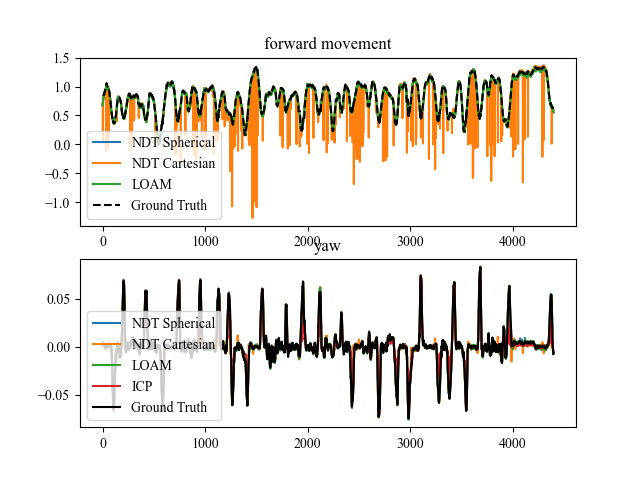

[ 141  167  168 ... 4371 4372 4373]


In [18]:
runlen = 4400 #4400

# NDT_spherical = np.loadtxt("KITTI_full_results/KITTI_estimates_NDT_spherical.txt")[:-1]
NDT_spherical = np.loadtxt("KITTI_full_results/KITTI_estimates_NDT_spherical_v2.txt")[:-1]
NDT_cart = np.loadtxt("KITTI_full_results/KITTI_estimates_NDT_cart.txt")[:]
NDT_cart[:,5] = -NDT_cart[:,3]
LOAM = np.loadtxt("KITTI_full_results/KITTI_estimates_LOAM.txt")[:]
LOAM[:,[3, 5]] = LOAM[:,[5, 3]]
LOAM[:, 5] = -LOAM[:, 5]
ICP = np.loadtxt("KITTI_full_results/KITTI_estimates_ICP.txt")[:]
ICP[:,[3, 5]] = ICP[:,[5, 3]]
ICP[:, 5] = -ICP[:, 5]

# print(np.shape(NDT_spherical))
# print(np.shape(NDT_cart))


East = mat_full[:,2,3]
North = mat_full[:,0,3]

fig, ax = plt.subplots(2,1)
ax[0].set_title("forward movement")
#per frame
ax[0].plot(NDT_spherical[:runlen,0], label = "NDT Spherical")
ax[0].plot(NDT_cart[:runlen,0], label = "NDT Cartesian")
ax[0].plot(LOAM[:runlen,0], label = "LOAM")
ax[0].plot(np.sqrt(np.diff(East[:runlen])**2 + np.diff(North[:runlen])**2), 'k--', label = "Ground Truth")
ax[0].legend(loc = "lower left")
#cumulative
# ax[0].plot(np.cumsum(NDT_spherical[:runlen,0]))
# ax[0].plot(np.cumsum(NDT_cart[:runlen,0]))
# ax[0].plot(np.cumsum(LOAM[:runlen,0]))
# ax[0].plot(np.cumsum(np.sqrt(np.diff(East[:runlen])**2 + np.diff(North[:runlen])**2)), 'k')

ax[1].set_title("yaw")
drot = np.diff(-euls[1,:runlen])
west = np.asarray(np.where(np.diff(East[:runlen]) < 0))[0,:]
drot[west] = -drot[west] #flip signs to align ENU with Body Frame rotations
print(west)
# south = np.asarray(np.where(np.diff(North[:runlen]) < 0))[0,:]
# negative = np.intersect1d(south,west)
# print(negative)
# drot[negative] = -drot[negative] #flip signs to align ENU with Body Frame rotations

#DEBUG: fix random sign flips skips drot 
for i in range(1,np.shape(drot)[0]):
#     if abs(drot[i] - drot[i-1]) > 0.05: #nope
     #temp fix
    if abs(drot[i]- LOAM[i,5]) > 0.005:
        if abs(drot[i] - NDT_spherical[i,5]) > 0.005:
#             drot[i] = drot[i-1]
            drot[i] = (NDT_spherical[i,5] + LOAM[i,5])/2

#per frame
ax[1].plot(NDT_spherical[:runlen,5], label = "NDT Spherical")
ax[1].plot(NDT_cart[:runlen,5], label = "NDT Cartesian")
ax[1].plot(LOAM[:runlen,5], label = "LOAM")
ax[1].plot(ICP[:runlen,5], label = "ICP")
ax[1].plot(drot, 'k', label = "Ground Truth")
#cumulative
# ax[1].plot(np.cumsum(NDT_spherical[:,5]), label = "NDT Spherical")
# ax[1].plot(np.cumsum(NDT_cart[:,5]), label = "NDT Cart")
# ax[1].plot(np.cumsum(LOAM[:,5]), label = "LOAM")
# ax[1].plot(np.cumsum(drot), 'k', label = "Ground Truth")
ax[1].legend(loc = "lower left")

<IPython.core.display.Javascript object>


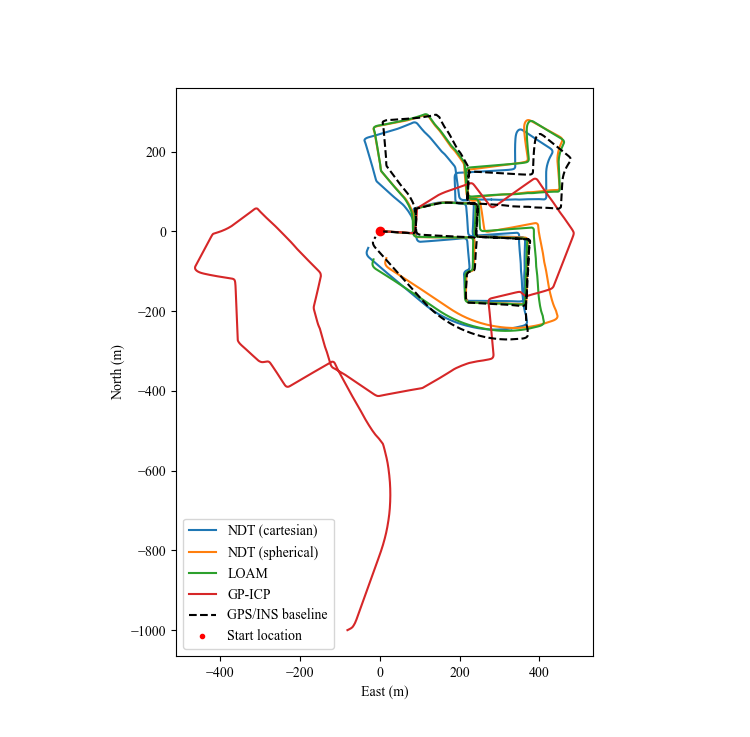

In [19]:
#plot xy total positions
fig, ax = plt.subplots(1,1)
ax.set_aspect('equal')

LOAM_total = np.zeros(np.shape(LOAM))
ICP_total = np.zeros(np.shape(ICP))
NDT_spherical_total = np.zeros(np.shape(NDT_spherical))
NDT_cart_total = np.zeros(np.shape(NDT_cart))

for i in range(np.shape(NDT_spherical)[0]):
    NDT_spherical_total[i] = np.sum(NDT_spherical[:i], axis = 0)
    NDT_cart_total[i] = np.sum(NDT_cart[:i], axis = 0)
    LOAM_total[i] = np.sum(LOAM[:i], axis = 0)
    ICP_total[i] = np.sum(ICP[:i], axis = 0)
    
#need to combine TOTAL heading with incremental changes in x and y (really should be ignoring y...)
NDT_spherical_traj = np.zeros([np.shape(NDT_spherical)[0], 2])
NDT_cart_traj = np.zeros([np.shape(NDT_cart)[0], 2])
LOAM_traj = np.zeros([np.shape(LOAM)[0], 2])
ICP_traj = np.zeros([np.shape(ICP)[0], 2])

for j in range(1, np.shape(NDT_spherical)[0]):
    #x[i] = x[i-1] + step_dist*cos(heading)z
    NDT_spherical_traj[j,0] = NDT_spherical_traj[j-1,0] + NDT_spherical[j,0]*np.cos(NDT_spherical_total[j,5])    
    NDT_cart_traj[j,0] = NDT_cart_traj[j-1,0] + NDT_cart[j,0]*np.cos(NDT_cart_total[j,5])    
    LOAM_traj[j,0] = LOAM_traj[j-1,0] + LOAM[j,0]*np.cos(LOAM_total[j,5])
    ICP_traj[j,0] = ICP_traj[j-1,0] + ICP[j,0]*np.cos(ICP_total[j,5])

    #y[i] = y[i-1] + step_dist*sin(heading)
    NDT_spherical_traj[j,1] = NDT_spherical_traj[j-1,1] + NDT_spherical[j,0]*np.sin(NDT_spherical_total[j,5])
    NDT_cart_traj[j,1] = NDT_cart_traj[j-1,1] + NDT_cart[j,0]*np.sin(NDT_cart_total[j,5])
    LOAM_traj[j,1] = LOAM_traj[j-1,1] + LOAM[j,0]*np.sin(LOAM_total[j,5])
    ICP_traj[j,1] = ICP_traj[j-1,1] + ICP[j,0]*np.sin(ICP_total[j,5])
    
#debug
# gt = np.array([East, North]).T
# rot_gt = R(np.deg2rad(-2))
# gt_zero= gt - gt[0] #zero out starting pos
# gt_zero[:, :2] = gt_zero[:, :2].dot(rot_gt)
# ax.plot(gt_zero[:runlen,0], gt_zero[:runlen,1], 'k', label = "Ground Truth")

ax.plot(NDT_cart_traj[:runlen,0], -NDT_cart_traj[:runlen,1], label = "NDT (cartesian)")
ax.plot(NDT_spherical_traj[:runlen,0], -NDT_spherical_traj[:runlen,1], label = "NDT (spherical)")
ax.plot(LOAM_traj[:runlen,0], -LOAM_traj[:runlen,1], label = 'LOAM')
ax.plot(ICP_traj[:runlen,0], -ICP_traj[:runlen,1], label = 'GP-ICP')
ax.plot(mat_full[0,2,3], mat_full[0,0,3], 'ro') #mark start in red
ax.plot(East[:runlen], North[:runlen], 'k--', label = "GPS/INS baseline")
ax.plot([0], 'r.', label = 'Start location')
ax.set_ylabel('North (m)', **font)
ax.set_xlabel('East (m)', **font)
ax.legend(loc = 'best')

In [20]:
#find RMSE of each method
gt_fwd = np.sqrt(np.diff(East[:runlen+1])**2 + np.diff(North[:runlen+1])**2)
err_NDT_spherical = NDT_spherical[:runlen,0] - gt_fwd
RMSE_NDT_spherical = np.sqrt(np.mean(err_NDT_spherical**2, axis = 0))
print("\n RMSE NDT (spherical): \n", RMSE_NDT_spherical, "meters")
err_NDT_spherical_rot = NDT_spherical[:runlen-1,5] - drot
RMSE_NDT_spherical_rot = np.sqrt(np.mean(err_NDT_spherical_rot**2, axis = 0))
print(np.rad2deg(RMSE_NDT_spherical_rot), "degrees")

idx_bad_NDT = np.asarray(np.where(NDT_cart[:runlen-1,0] < 0))
idx_good_NDT = np.asarray(np.where(NDT_cart[:runlen-1,0] > 0))[0,:]
# idx_bad_NDT = np.asarray(np.where(abs(NDT_cart[:runlen-1,0] 
#                        - np.sqrt(np.diff(East[:runlen])**2 + np.diff(North[:runlen])**2))>0.25))
# idx_good_NDT = np.asarray(np.where(abs(NDT_cart[:runlen-1,0] 
#                        - np.sqrt(np.diff(East[:runlen])**2 + np.diff(North[:runlen])**2))<0.25))[0,:]
err_NDT_cart = NDT_cart[idx_good_NDT,0] - gt_fwd[idx_good_NDT]
# err_NDT_cart = NDT_cart[:runlen,0] - gt_fwd[:runlen]
RMSE_NDT_cart = np.sqrt(np.mean(err_NDT_cart**2, axis = 0))
print("\n",np.shape(idx_bad_NDT)[1], "bad registrations from cartesian NDT")
print("RMSE NDT (cart) \n", RMSE_NDT_cart, "meters")
err_NDT_cart_rot = NDT_cart[:runlen-1,5] - drot
RMSE_NDT_cart_rot = np.sqrt(np.mean(err_NDT_cart_rot**2, axis = 0))
print(np.rad2deg(RMSE_NDT_cart_rot), "degrees")

err_LOAM = LOAM[:runlen,0] - gt_fwd
RMSE_LOAM = np.sqrt(np.mean(err_LOAM**2, axis = 0))
print("\n RMSE LOAM \n", RMSE_LOAM)
err_LOAM_rot = LOAM[:runlen-1,5] - drot
RMSE_LOAM_rot = np.sqrt(np.mean(err_LOAM_rot**2, axis = 0))
print(np.rad2deg(RMSE_LOAM_rot), "degrees")

err_ICP = ICP[:runlen,0] - gt_fwd
# err_ICP[:,3:] = np.rad2deg(err_ICP[:,3:]) #convert angular errors to deg
RMSE_ICP = np.sqrt(np.mean(err_ICP**2, axis = 0))
print("\n RMSE ICP \n", RMSE_ICP)
err_ICP_rot = ICP[:runlen-1,5] - drot
RMSE_ICP_rot = np.sqrt(np.mean(err_ICP_rot**2, axis = 0))
print(np.rad2deg(RMSE_ICP_rot), "degrees")


 RMSE NDT (spherical): 
 0.01929448413256369 meters
0.07529385275534649 degrees

 82 bad registrations from cartesian NDT
RMSE NDT (cart) 
 0.10552997344711283 meters
0.14851417732985825 degrees

 RMSE LOAM 
 0.02073881525294995
0.07845836998959291 degrees

 RMSE ICP 
 0.043371760529471386
0.44176880697498233 degrees


## KITTI City drive 0005

<IPython.core.display.Javascript object>


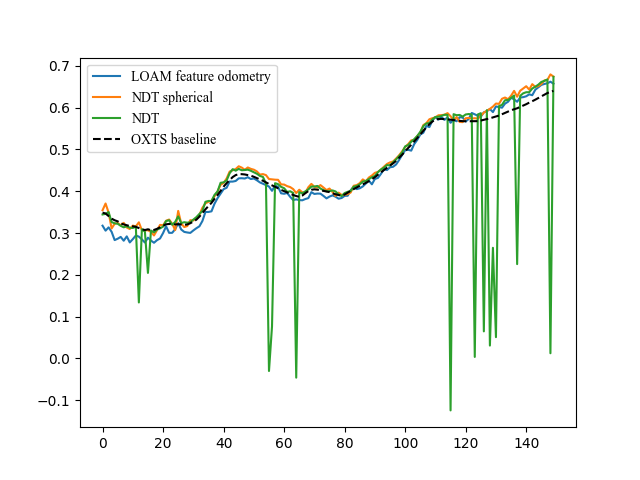


 pred_RMSE 
 [1.36784674e-03 9.90289953e-04 9.76536716e-05 1.08499447e-03
 1.06422210e-03 6.66631045e-03]


In [11]:
fig, ax = plt.subplots()
plt.rc('font',family='Times New Roman')
font = {'fontname':'Times New Roman'}


# LOAM = np.loadtxt("KITTI_results/KITTI_LOAM.txt") 
LOAM = np.loadtxt("KITTI_results/KITTI_LOAM_v3.txt") #test 
LOAM[:,5], LOAM[:,3] = LOAM[:,3], LOAM[:,5] #fix order of yaw and roll on LOAM output
# LOAM_noGP = np.loadtxt("KITTI_results/KITTI_LOAM_noGP.txt")

ICP = np.loadtxt("KITTI_results/KITTI_ICP.txt") 
ICP[:,5], ICP[:,3] = ICP[:,3], ICP[:,5] #fix order of yaw and roll on LOAM output

NDT = np.loadtxt("KITTI_results/KITTI_NDT.txt") 
NDT[:,5], NDT[:,3] = NDT[:,3], NDT[:,5] #fix order of yaw and roll on LOAM output

ICET = np.loadtxt("KITTI_results/ICET_estimates.txt")
ICET[:,5] = -ICET[:,5]
ICET_pred_stds = np.loadtxt("KITTI_results/ICET_pred_stds.txt")
BC = np.loadtxt("KITTI_results/ICET_no_correction.txt")
BC[:,5] = -BC[:,5]
ICET_cart = np.loadtxt("KITTI_results/ICET_cart_estimates.txt")
ICET_cart[:,5] = -ICET_cart[:,5]

ICET_pred_RMSE = np.mean(ICET_pred_stds, axis = 0)
ICET_pred_RMSE[3:] = np.rad2deg(ICET_pred_RMSE[3:]) #convert rad2deg
print("\n pred_RMSE \n", ICET_pred_RMSE)

OXTS_baseline = np.loadtxt("KITTI_results/OXTS_baseline.txt")
# OXTS_baseline = OXTS_baseline/0.1*0.1037 #fix difference in framerate between LIDAR and OXTS baseline sensors
# OXTS_baseline = (OXTS_baseline + OXTS_baseline/0.1*0.1037)/2 #fix difference in framerate between LIDAR and OXTS baseline sensors

component = 0 #forward translation
# component = 5 #yaw

# #---filter out non-converging frames-----------------
# trans_thresh = 0.4
# rot_thresh = 0.01 #0.01
# bad_idx = np.zeros([np.shape(ICET)[0],1]) #keep track of all the bad frames
# for i in range(1, np.shape(ICET)[0]):
#     #w.r.t. ground truth
# #     if abs(ICET[i,1] - OXTS_baseline[i,1]) > trans_thresh:
# # #         ICET[i,1] = ICET[i-1,1] #realistic filter
# #         ICET[i,1] = OXTS_baseline[i,1] #for debug
# #         bad_idx[i] = 1
# #     if abs(ICET[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# # #         ICET[i,5] = ICET[i-1,5] #realistic filter
# #         ICET[i,5] = OXTS_baseline[i,5] #for debug
        
# #     if abs(LOAM[i,1] - OXTS_baseline[i,1]) > trans_thresh:
# #         LOAM[i,1] = OXTS_baseline[i,1] #for debug
# #     if abs(LOAM[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# #         LOAM[i,5] = OXTS_baseline[i,5] #for debug
    
# #     if abs(ICP[i,1] - OXTS_baseline[i,1]) > trans_thresh:
# #         ICP[i,1] = OXTS_baseline[i,1] #for debug
# #     if abs(ICP[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# #         ICP[i,5] = OXTS_baseline[i,5] #for debug
        
# #     if abs(NDT[i,0] - OXTS_baseline[i,0]) > trans_thresh:
#     if NDT[i,0] < 0.05:
#         NDT[i,0] = OXTS_baseline[i,0] #for debug
#         bad_idx[i] = 1
# #     if abs(NDT[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# #         NDT[i,5] = OXTS_baseline[i,5] #for debug
# #         bad_idx[i] = 1

    
#     #w.r.t. previous estimates
# #     if abs(ICET[i,1] - ICET[i-1,1]) > trans_thresh:
# #         ICET[i,1] = ICET[i-1,1]
# #     if abs(ICET[i,5] - ICET[i-1,5]) > rot_thresh:
# #         ICET[i,5] = ICET[i-1,5]
# print("removed", np.sum(bad_idx), "of", np.shape(ICET)[0], "frames")
# #----------------------------------------------------

ax.plot(LOAM[:,component], label = "LOAM feature odometry")
# ax.plot(LOAM_noGP[:,component], label = "LOAM (no GP)")
ax.plot(ICET[:,component], label = "NDT spherical")
# ax.plot(ICET_cart[:,component], label = "ICET cartesian")
# ax.plot(ICP[:,component], label = "ICP")
ax.plot(NDT[:,component], label = "NDT")
# ax.plot(BC[:,component], label = "ICET before correction")
ax.plot(OXTS_baseline[:,component], 'k--', label = "OXTS baseline")

plt.legend()

## Plot Cumulative Error

In [ ]:
diffx_ICET = OXTS_baseline[:,component] - ICET[:,component]
cum_diffx_ICET = np.zeros(np.shape(diffx_ICET))

diffx_ICET_cart = OXTS_baseline[:,component] - ICET_cart[:,component]
cum_diffx_ICET_cart = np.zeros(np.shape(diffx_ICET_cart))

diffx_LOAM = OXTS_baseline[:,component] - LOAM[:,component]
cum_diffx_LOAM= np.zeros(np.shape(diffx_LOAM))

diffx_ICP = OXTS_baseline[:,component] - ICP[:,component]
cum_diffx_ICP= np.zeros(np.shape(diffx_ICP))

diffx_NDT = OXTS_baseline[:,component] - NDT[:,component]
cum_diffx_NDT= np.zeros(np.shape(diffx_NDT))

for j in range(np.shape(diffx_ICET)[0]):
    cum_diffx_ICET[j] = np.sum(diffx_ICET[:j]) 
    cum_diffx_ICP[j] = np.sum(diffx_ICP[:j]) 
    cum_diffx_NDT[j] = np.sum(diffx_NDT[:j]) 
    cum_diffx_LOAM[j] = np.sum(diffx_LOAM[:j]) 
    cum_diffx_ICET_cart[j] = np.sum(diffx_ICET_cart[:j])

fig, ax = plt.subplots()
ax.plot(cum_diffx_ICET, label = "NDT (spherical)")
# ax.plot(cum_diffx_ICET_cart, label = "ICET (cartesian)")
# ax.plot(cum_diffx_ICP, label = "ICP")
ax.plot(cum_diffx_NDT, label = "NDT (cartesian)")
ax.plot(cum_diffx_LOAM, label = "LOAM")
plt.legend()

## Plot trajectory of results from each registration technique

In [ ]:
#plot xy total positions
fig2, ax2 = plt.subplots(1,1)
ax2.set_aspect('equal')

OXTS_total = np.zeros(np.shape(OXTS_baseline))
ICET_total = np.zeros(np.shape(ICET))
ICP_total = np.zeros(np.shape(ICP))
NDT_total = np.zeros(np.shape(NDT))
ICET_cart_total = np.zeros(np.shape(ICET_cart))
LOAM_total = np.zeros(np.shape(LOAM))

for i in range(np.shape(OXTS_baseline)[0]):
    OXTS_total[i] = np.sum(OXTS_baseline[:i], axis = 0)
    ICET_total[i] = np.sum(ICET[:i], axis = 0)
    ICP_total[i] = np.sum(ICP[:i], axis = 0)
    NDT_total[i] = np.sum(NDT[:i], axis = 0)
    ICET_cart_total[i] = np.sum(ICET_cart[:i], axis = 0)
    LOAM_total[i] = np.sum(LOAM[:i], axis = 0)

#need to combine TOTAL heading with incremental changes in x and y (really should be ignoring y...)
ICET_traj = np.zeros([np.shape(ICET)[0], 2])
ICP_traj = np.zeros([np.shape(ICP)[0], 2])
NDT_traj = np.zeros([np.shape(NDT)[0], 2])
ICET_cart_traj = np.zeros([np.shape(ICET_cart)[0], 2])
OXTS_traj = np.zeros([np.shape(ICET)[0], 2])
LOAM_traj = np.zeros([np.shape(LOAM)[0], 2])
for j in range(1, np.shape(ICET)[0]):
    #x[i] = x[i-1] + step_dist*cos(heading)
    ICET_traj[j,0] = ICET_traj[j-1,0] + ICET[j,0]*np.cos(ICET_total[j,5]) #+ ICET_estimates[j,1]*np.sin(ICET_total[j,5])
    ICET_cart_traj[j,0] = ICET_cart_traj[j-1,0] + ICET_cart[j,0]*np.cos(ICET_cart_total[j,5])
    OXTS_traj[j,0] = OXTS_traj[j-1,0] + OXTS_baseline[j,0]*np.cos(OXTS_total[j,5]) #+ OXTS_baseline[j,1]*np.sin(OXTS_total[j,5])
    LOAM_traj[j,0] = LOAM_traj[j-1,0] + LOAM[j,0]*np.cos(LOAM_total[j,3]) #+ ICET_estimates[j,1]*np.sin(ICET_total[j,5])
    ICP_traj[j,0] = ICP_traj[j-1,0] + ICP[j,0]*np.cos(ICP_total[j,5])
    NDT_traj[j,0] = NDT_traj[j-1,0] + NDT[j,0]*np.cos(NDT_total[j,5])

    #y[i] = y[i-1] + step_dist*sin(heading)
    ICET_traj[j,1] = ICET_traj[j-1,1] + ICET[j,0]*np.sin(ICET_total[j,5]) #+ ICET_estimates[j,1] * np.cos(ICET_total[j,5])
    ICET_cart_traj[j,1] = ICET_cart_traj[j-1,1] + ICET_cart[j,0]*np.sin(ICET_cart_total[j,5])
    ICP_traj[j,1] = ICP_traj[j-1,1] + ICP[j,0]*np.sin(ICP_total[j,5])
    NDT_traj[j,1] = NDT_traj[j-1,1] + NDT[j,0]*np.sin(NDT_total[j,5])
    OXTS_traj[j,1] = OXTS_traj[j-1,1] + OXTS_baseline[j,0]*np.sin(OXTS_total[j,5]) #+ OXTS_baseline[j,1] * np.cos(OXTS_total[j,5])
    LOAM_traj[j,1] = LOAM_traj[j-1,1] + LOAM[j,0]*np.sin(LOAM_total[j,3]) #+ ICET_estimates[j,1] * np.cos(ICET_total[j,5])
    
# draw figure horizontally
# ax2.plot(-ICET_traj[:,0], ICET_traj[:,1], 'b-', label = "ICET Lidar Odometry")
# ax2.plot(-OXTS_traj[:,0], OXTS_traj[:,1], 'r-', label = 'GPS/INS baseline')
# ax2.set_xlabel('North (m)', **font)
# ax2.set_ylabel('East (m)', **font)

# draw figure vertically (true NE alignment)
# ax2.plot(ICET_cart_traj[:,1], ICET_cart_traj[:,0], label = "ICET (cartesian)")
ax2.plot(NDT_traj[:,0], NDT_traj[:,1], label = "NDT (cartesian)")
ax2.plot(ICET_traj[:,0], ICET_traj[:,1], label = "NDT (spherical)")
ax2.plot(LOAM_traj[:,0], LOAM_traj[:,1], label = 'LOAM')
ax2.plot(ICP_traj[:,0], ICP_traj[:,1], label = "GP-ICP")
ax2.plot(OXTS_traj[:,0], OXTS_traj[:,1], 'k--', label = 'GPS/INS baseline')
ax2.plot([0], 'r.', label = 'Start location')
ax2.set_xlabel('North (m)', **font)
ax2.set_ylabel('East (m)', **font)
ax2.legend(loc = 'lower left')

In [ ]:
err_NDT_cart = (NDT - OXTS_baseline)
err_NDT_cart[:,3:] = np.rad2deg(err_NDT_cart[:,3:]) #convert angular errors to deg
RMSE_NDT_cart = np.sqrt(np.mean(err_NDT_cart**2, axis = 0))
print("\n RMSE NDT (cartesian) \n", RMSE_NDT_cart)
# print(np.mean(err_NDT, axis = 0))

err_NDT_spherical = (ICET - OXTS_baseline)
err_NDT_spherical[:,3:] = np.rad2deg(err_NDT_spherical[:,3:]) #convert angular errors to deg
RMSE_NDT_spherical = np.sqrt(np.mean(err_NDT_spherical**2, axis = 0))
print("\n RMSE NDT (spherical) \n", RMSE_NDT_spherical)
# print(np.mean(err_NDT, axis = 0))

err_LOAM = (LOAM - OXTS_baseline)
err_LOAM[:,3:] = np.rad2deg(err_LOAM[:,3:]) #convert angular errors to deg
RMSE_LOAM = np.sqrt(np.mean(err_LOAM**2, axis = 0))
print("\n RMSE LOAM \n", RMSE_LOAM)
# print(np.mean(err_LOAM, axis = 0))

err_ICP = (ICP - OXTS_baseline)
err_ICP[:,3:] = np.rad2deg(err_ICP[:,3:]) #convert angular errors to deg
RMSE_ICP = np.sqrt(np.mean(err_ICP**2, axis = 0))
print("\n RMSE ICP \n", RMSE_ICP)
# print(np.mean(err_LOAM, axis = 0))

# Plot results of each algorithm on Argoverse
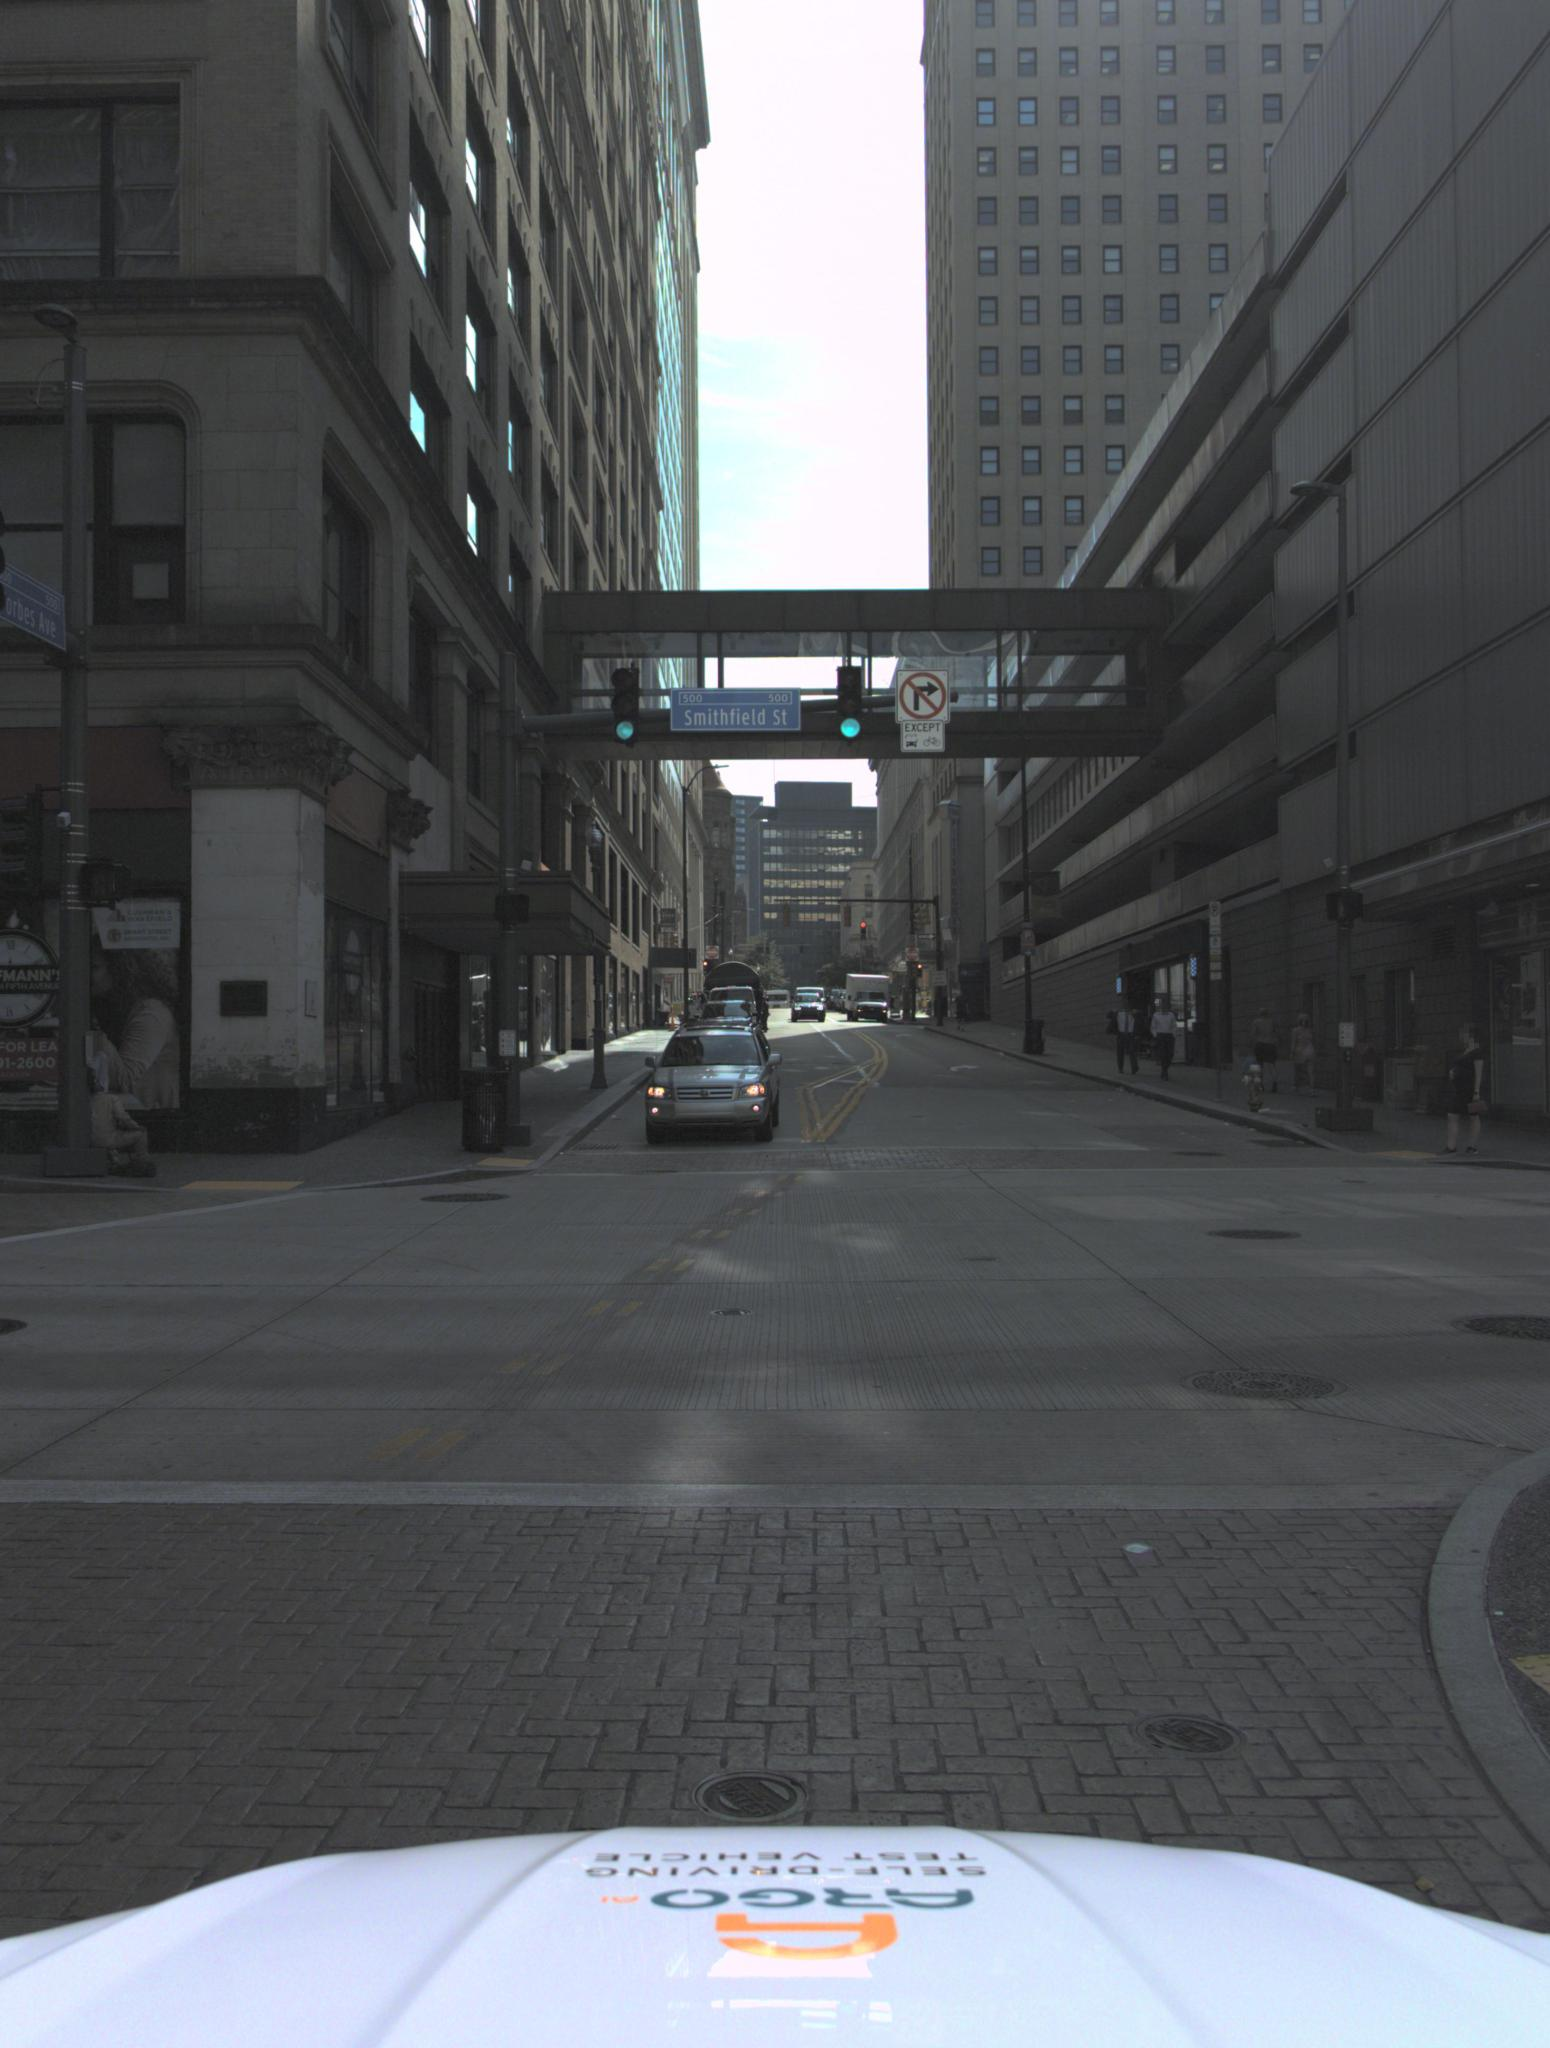


In [ ]:
fig, ax = plt.subplots()
plt.rc('font',family='Times New Roman')
font = {'fontname':'Times New Roman'}

# LOAM = np.loadtxt("Ford_results/LOAM.txt")
# LOAM[:,5], LOAM[:,3] = -LOAM[:,3], LOAM[:,5] #fix order of yaw and roll on LOAM output

# Urban Canyon scene ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# NDT_spherical = np.loadtxt("Argoverse_results/Urban_Canyon/Argoverse_NDT_spherical.txt")
NDT_spherical = np.loadtxt("Argoverse_results/Urban_Canyon/Argoverse_NDT_spherical_nogp.txt")
NDT_cart = np.loadtxt("Argoverse_results/Urban_Canyon/NDT_cart.txt")
# LOAM = np.loadtxt("Argoverse_results/Urban_Canyon/LOAM.txt")
LOAM = np.loadtxt("Argoverse_results/Urban_Canyon/LOAM_v3.txt")
ICP = np.loadtxt("Argoverse_results/Urban_Canyon/ICP.txt")
gt = np.loadtxt("Argoverse_results/Urban_Canyon/gt_lidar.txt") #in vehicle body frame
print(np.shape(gt))
rotang = -26
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# # Suburban scene ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# NDT_spherical = np.loadtxt("Argoverse_results/suburb/Argoverse_NDT_spherical_nogp.txt")
# NDT_spherical = NDT_spherical[:-2]
# # NDT_spherical = np.loadtxt("Argoverse_results/Urban_Canyon/Argoverse_NDT_spherical_nogp.txt")
# NDT_cart = np.loadtxt("Argoverse_results/suburb/NDT_cart.txt")
# LOAM = np.loadtxt("Argoverse_results/suburb/LOAM_v2.txt")
# gt = np.loadtxt("Argoverse_results/suburb/gt_lidar.txt") #in vehicle body frame
# gt = gt[:-1]
# print(np.shape(gt))
# rotang = -88
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



dgt = np.diff(gt, axis = 0)
dgt[:,0] = np.sqrt(np.sum(dgt[:,:2]**2, axis = 1))
dgt[:,1] = 0
# OXTS_baseline_enu = np.loadtxt("Argoverse_results/truth_enu.txt") #in ENU
dgt[:,5], dgt[:,3] = np.deg2rad(-dgt[:,3]), np.deg2rad(dgt[:,5])
dgt[dgt[:,5] < -5] += np.array([0,0,0,0,0,2*np.pi]) #correct wraparound error
LOAM[:,5], LOAM[:,3] = -LOAM[:,3], LOAM[:,5]
NDT_cart[:,5], NDT_cart[:,3] = -NDT_cart[:,3], NDT_cart[:,5]
ICP[:,5], ICP[:,3] = -ICP[:,3], ICP[:,5]

#which solution component to plot
component = 0 #forward translation
# component = 5 #yaw
# component = 1

# ax.plot(LOAM[:,component], label = "LOAM feature odometry")
ax.plot(NDT_cart[:,component], label = "NDT (cartesian)")
ax.plot(NDT_spherical[:,component], label = "NDT (spherical)")
ax.plot(LOAM[:,component], label = "LOAM")
ax.plot(ICP[:,component], label = "ICP")
ax.plot(dgt[:,component], 'k', label = "OXTS baseline")
# ax.plot(bad_idx)
plt.legend()

## Plot trajectory on Argoverse

In [ ]:
#plot xy total positions
fig2, ax2 = plt.subplots(1,1)
# ax2.set_aspect('equal')

dgt_total = np.zeros(np.shape(dgt))
LOAM_total = np.zeros(np.shape(LOAM))
ICP_total = np.zeros(np.shape(ICP))
NDT_spherical_total = np.zeros(np.shape(NDT_spherical))
NDT_cart_total = np.zeros(np.shape(NDT_cart))


for i in range(np.shape(dgt)[0]):
    NDT_spherical_total[i] = np.sum(NDT_spherical[:i], axis = 0)
    NDT_cart_total[i] = np.sum(NDT_cart[:i], axis = 0)
    dgt_total[i] = np.sum(dgt[:i], axis = 0)
    LOAM_total[i] = np.sum(LOAM[:i], axis = 0)
    ICP_total[i] = np.sum(ICP[:i], axis = 0)
    
# print(NDT_spherical_total)
# print(NDT_spherical)
    
#need to combine TOTAL heading with incremental changes in x and y (really should be ignoring y...)
NDT_spherical_traj = np.zeros([np.shape(NDT_spherical)[0], 2])
NDT_cart_traj = np.zeros([np.shape(NDT_cart)[0], 2])
dgt_traj = np.zeros([np.shape(dgt)[0], 2])
LOAM_traj = np.zeros([np.shape(LOAM)[0], 2])
ICP_traj = np.zeros([np.shape(ICP)[0], 2])


for j in range(1, np.shape(dgt)[0]):
    #x[i] = x[i-1] + step_dist*cos(heading)z
    NDT_spherical_traj[j,0] = NDT_spherical_traj[j-1,0] + NDT_spherical[j,0]*np.cos(NDT_spherical_total[j,5])    
    NDT_cart_traj[j,0] = NDT_cart_traj[j-1,0] + NDT_cart[j,0]*np.cos(NDT_cart_total[j,5])    
    dgt_traj[j,0] = dgt_traj[j-1,0] + dgt[j,0]*np.cos(dgt_total[j,5])
    LOAM_traj[j,0] = LOAM_traj[j-1,0] + LOAM[j,0]*np.cos(LOAM_total[j,5])
    ICP_traj[j,0] = ICP_traj[j-1,0] + ICP[j,0]*np.cos(ICP_total[j,5])
    
    #y[i] = y[i-1] + step_dist*sin(heading)
    NDT_spherical_traj[j,1] = NDT_spherical_traj[j-1,1] + NDT_spherical[j,0]*np.sin(NDT_spherical_total[j,5])
    NDT_cart_traj[j,1] = NDT_cart_traj[j-1,1] + NDT_cart[j,0]*np.sin(NDT_cart_total[j,5])
    dgt_traj[j,1] = dgt_traj[j-1,1] + dgt[j,0]*np.sin(dgt_total[j,5])
    LOAM_traj[j,1] = LOAM_traj[j-1,1] + LOAM[j,0]*np.sin(LOAM_total[j,5])
    ICP_traj[j,1] = ICP_traj[j-1,1] + ICP[j,0]*np.sin(ICP_total[j,5])

    
    #(using truth_test)
#     OXTS_traj[j,0] = OXTS_traj[j-1,0] + OXTS_baseline_enu[j,0]*0.1
#     OXTS_traj[j,1] = OXTS_traj[j-1,1] + OXTS_baseline_enu[j,1]*0.1

    
#rotate ICET solution to align with ground truth initial heading
rot_gt = R(np.deg2rad(rotang))
gt_zero= gt - gt[0] #zero out starting pos
gt_zero[:, :2] = gt_zero[:, :2].dot(rot_gt)

# #rotate all to align with ENU
# rot = R(np.deg2rad(-18))
# NDT_spherical_traj[:, :2] = NDT_spherical_traj[:, :2].dot(rot)

# draw figure vertically (true NE alignment)
# ax2.plot(-ICET_traj[:,1], ICET_traj[:,0], label = "ICET (spherical)")
# ax2.plot(-ICET_traj_test[:,1], ICET_traj_test[:,0], label = "TEST")
# ax2.plot(-ICP_traj[:,1], ICP_traj[:,0], label = "GP-ICP")
# ax2.plot(-NDT_traj[:,1], NDT_traj[:,0], label = "NDT (cartesian)")
ax2.plot(NDT_cart_traj[:,0], NDT_cart_traj[:,1], label = "NDT (cartesian)")
ax2.plot(NDT_spherical_traj[:,0], NDT_spherical_traj[:,1], label = "NDT (spherical)")
ax2.plot(LOAM_traj[:,0], LOAM_traj[:,1], label = 'LOAM')
ax2.plot(ICP_traj[:,0], ICP_traj[:,1], label = 'GP-ICP')
ax2.plot(gt_zero[:,0], gt_zero[:,1], 'k--', label = 'GPS/INS baseline')
ax2.plot([0], 'r.', label = 'Start location')
ax2.set_xlabel('North (m)', **font)
ax2.set_ylabel('East (m)', **font)
ax2.legend(loc = 'best')

In [ ]:
#find RMSE of each method
err_NDT_cart = (NDT_cart - dgt)
err_NDT_cart[:,3:] = np.rad2deg(err_NDT_cart[:,3:]) #convert angular errors to deg
RMSE_NDT_cart = np.sqrt(np.mean(err_NDT_cart**2, axis = 0))
print("\n RMSE NDT (cartesian) \n", RMSE_NDT_cart)
# print(np.mean(err_NDT, axis = 0))

err_NDT_spherical = (NDT_spherical - dgt)
err_NDT_spherical[:,3:] = np.rad2deg(err_NDT_spherical[:,3:]) #convert angular errors to deg
RMSE_NDT_spherical = np.sqrt(np.mean(err_NDT_spherical**2, axis = 0))
print("\n RMSE NDT (spherical) \n", RMSE_NDT_spherical)
# print(np.mean(err_NDT, axis = 0))

err_LOAM = (LOAM - dgt)
err_LOAM[:,3:] = np.rad2deg(err_LOAM[:,3:]) #convert angular errors to deg
RMSE_LOAM = np.sqrt(np.mean(err_LOAM**2, axis = 0))
print("\n RMSE LOAM \n", RMSE_LOAM)
# print(np.mean(err_LOAM, axis = 0))

err_ICP = (ICP - dgt)
err_ICP[:,3:] = np.rad2deg(err_ICP[:,3:]) #convert angular errors to deg
RMSE_ICP = np.sqrt(np.mean(err_ICP**2, axis = 0))
print("\n RMSE ICP \n", RMSE_ICP)
# print(np.mean(err_LOAM, axis = 0))

## Plot results of each algorithm on Ford Campus dataset drive 1

In [ ]:
fig, ax = plt.subplots()
plt.rc('font',family='Times New Roman')
font = {'fontname':'Times New Roman'}

LOAM = np.loadtxt("Ford_results/LOAM.txt") #was this
# LOAM = np.loadtxt("Ford_results/LOAM_v2.txt") #test
LOAM[:,5], LOAM[:,3] = -LOAM[:,3], LOAM[:,5] #fix order of yaw and roll on LOAM output
# LOAM_noGP = np.loadtxt("KITTI_results/KITTI_LOAM_noGP.txt")

# ICET = np.loadtxt("Ford_results/ICET_estimates_ford.txt")
ICET = np.loadtxt("Ford_results/Ford_full_estimates_v10.txt")
# ICET[:,1] = np.sqrt(ICET[:,0]**2 + ICET[:,1]**2 ) #test

NDT_spherical = np.loadtxt("Ford_results/Ford_full_estimates_NDT.txt")
# NDT_spherical_backwards = np.loadtxt("Ford_results/Ford_full_estimates_NDT_backwards.txt")
# ICET[:,1] = np.sqrt(NDT_spherical_backwards[:,1]**2 + NDT_spherical_backwards[:,1]**2)

# ICET = -NDT_spherical_backwards


ICP = np.loadtxt("Ford_results/ICP.txt")
ICP[:,5], ICP[:,3] = -ICP[:,3], ICP[:,5]
NDT = np.loadtxt("Ford_results/NDT_cart.txt") #1m voxel size
# NDT = np.loadtxt("Ford_results/NDT_cart_v2.txt") #0.5m voxel size
NDT[:,5], NDT[:,3] = -NDT[:,3], NDT[:,5]


OXTS_baseline = np.loadtxt("Ford_results/truth_body_frame.txt") #in vehicle body frame
OXTS_baseline_enu = np.loadtxt("Ford_results/truth_enu.txt") #in ENU
# OXTS_baseline[:,1] = -OXTS_baseline[:,1]
# OXTS_baseline = (OXTS_baseline + OXTS_baseline/0.1*0.1037)/2 #fix difference in framerate between LIDAR and OXTS baseline sensors
# OXTS_baseline = OXTS_baseline/0.997 #test: fix difference in framerate between LIDAR/GPS??
runlen = np.shape(ICET)[0] + 1
OXTS_baseline = (OXTS_baseline[:runlen-1,:]/10 + OXTS_baseline[1:runlen,:]/10)/2
ICP = ICP[:runlen-1,:]
NDT = NDT[:runlen-1,:]
LOAM = LOAM[:runlen-1,:]
print(np.shape(ICP))

#RESCALE ALL LIDAR MEASUREMNTS SINCE THEY ARE ACTUALLY RECORDED AT 9.98 Hz!!! (not 10)
# ICET = ICET/0.998
# ICP = ICP/0.998
# LOAM = LOAM/0.998
# NDT = NDT/0.998
# NDT_spherical = NDT_spherical/0.998

#which solution component to plot
component = 1 #forward translation
# component = 5 #yaw
# component = 0

# #---filter out non-converging frames-----------------
# trans_thresh = 0.5
# rot_thresh = 0.01 #0.01
# bad_idx = np.zeros([np.shape(ICET)[0],1]) #keep track of all the bad frames
# for i in range(1, np.shape(ICET)[0]):
#     #w.r.t. ground truth
# #     if abs(ICET[i,1] - OXTS_baseline[i,1]) > trans_thresh:
# # #         ICET[i,1] = ICET[i-1,1] #realistic filter
# #         ICET[i,1] = OXTS_baseline[i,1] #for debug
# #         bad_idx[i] = 1
# #     if abs(ICET[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# # #         ICET[i,5] = ICET[i-1,5] #realistic filter
# #         ICET[i,5] = OXTS_baseline[i,5] #for debug
# #         bad_idx[i] = 1
        
# #     if abs(LOAM[i,1] - OXTS_baseline[i,1]) > trans_thresh:
# #         LOAM[i,1] = OXTS_baseline[i,1] #for debug
# #     if abs(LOAM[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# #         LOAM[i,5] = OXTS_baseline[i,5] #for debug
    
# #     if abs(ICP[i,1] - OXTS_baseline[i,1]) > trans_thresh:
# #         ICP[i,1] = OXTS_baseline[i,1] #for debug
# #     if abs(ICP[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# #         ICP[i,5] = OXTS_baseline[i,5] #for debug
        
# #     if abs(NDT[i,1] - OXTS_baseline[i,1]) > trans_thresh:
# #         NDT[i,1] = OXTS_baseline[i,1] #for debug
# #         bad_idx[i] = 1
# #     if abs(NDT[i,5] - OXTS_baseline[i,5]) > rot_thresh:
# #         NDT[i,5] = OXTS_baseline[i,5] #for debug
# #         bad_idx[i] = 1

#     if abs(NDT[i,1] - OXTS_baseline[i,1]) > trans_thresh:
#         NDT[i,1] = OXTS_baseline[i,1] #for debug
#         bad_idx[i] = 1
#     if abs(NDT[i,5] - OXTS_baseline[i,5]) > rot_thresh:
#         NDT[i,5] = OXTS_baseline[i,5] #for debug
#         bad_idx[i] = 1
    
#     #w.r.t. previous estimates
# #     if abs(ICET[i,1] - ICET[i-1,1]) > trans_thresh:
# #         ICET[i,1] = ICET[i-1,1]
# #     if abs(ICET[i,5] - ICET[i-1,5]) > rot_thresh:
# #         ICET[i,5] = ICET[i-1,5]
# print("removed", np.sum(bad_idx), "of", np.shape(ICET)[0], "frames")
# #----------------------------------------------------

ax.plot(LOAM[:,component], label = "LOAM feature odometry")
# ax.plot(ICP[:,component], label = "GP-ICP")
ax.plot(ICET[:,component], label = "ICET (spherical)")
ax.plot(NDT[:,component], label = "NDT (cartesian)")
ax.plot(OXTS_baseline[:,component], 'k', label = "OXTS baseline")
# ax.plot(bad_idx)
plt.legend()

In [ ]:
#find RMSE of each method
err_ICET = (ICET - OXTS_baseline) #angular errors in rad
# print(OXTS_baseline[600])
# print(ICET[600])
err_ICET[:,3:] = np.rad2deg(err_ICET[:,3:]) #convert angular errors to deg
RMSE_ICET = np.sqrt(np.mean(err_ICET**2, axis = 0))
print("\n RMSE ICET \n", RMSE_ICET)
# print(np.mean(err_ICET, axis = 0))

err_NDT = (NDT - OXTS_baseline)
err_NDT[:,3:] = np.rad2deg(err_NDT[:,3:]) #convert angular errors to deg
RMSE_NDT = np.sqrt(np.mean(err_NDT**2, axis = 0))
print("\n RMSE NDT (cartesian) \n", RMSE_NDT)
# print(np.mean(err_NDT, axis = 0))

err_NDT_spherical = (NDT_spherical - OXTS_baseline)
err_NDT_spherical[:,3:] = np.rad2deg(err_NDT_spherical[:,3:]) #convert angular errors to deg
RMSE_NDT_spherical = np.sqrt(np.mean(err_NDT_spherical**2, axis = 0))
print("\n RMSE NDT (spherical) \n", RMSE_NDT_spherical)
# print(np.mean(err_NDT, axis = 0))

err_ICP = (ICP - OXTS_baseline)
err_ICP[:,3:] = np.rad2deg(err_ICP[:,3:]) #convert angular errors to deg
RMSE_ICP = np.sqrt(np.mean(err_ICP**2, axis = 0))
print("\n RMSE ICP \n", RMSE_ICP)
# print(np.mean(err_ICP, axis = 0))

err_LOAM = (LOAM - OXTS_baseline)
err_LOAM[:,3:] = np.rad2deg(err_LOAM[:,3:]) #convert angular errors to deg
RMSE_LOAM = np.sqrt(np.mean(err_LOAM**2, axis = 0))
print("\n RMSE LOAM \n", RMSE_LOAM)
# print(np.mean(err_LOAM, axis = 0))

## Plot cumulative error on Ford

In [ ]:
diffx_ICET = OXTS_baseline[:,component] - ICET[:,component]
cum_diffx_ICET = np.zeros(np.shape(diffx_ICET))

diffx_ICP = OXTS_baseline[:,component] - ICP[:,component]
cum_diffx_ICP = np.zeros(np.shape(diffx_ICP))

diffx_NDT = OXTS_baseline[:,component] - NDT[:,component]
cum_diffx_NDT = np.zeros(np.shape(diffx_NDT))

diffx_NDT_spherical = OXTS_baseline[:,component] - NDT_spherical[:,component]
cum_diffx_NDT_spherical = np.zeros(np.shape(diffx_NDT_spherical))

diffx_LOAM = OXTS_baseline[:,component] - LOAM[:,component]
cum_diffx_LOAM = np.zeros(np.shape(diffx_LOAM))

# diffx_ICET_cart = OXTS_baseline[:,component] - ICET_cart[:,component] #only for KITTI so far...
# cum_diffx_ICET_cart = np.zeros(np.shape(diffx_ICET_cart)) #only for KITTI so far...


for j in range(np.shape(diffx_ICET)[0]):
    cum_diffx_ICET[j] = np.sum(diffx_ICET[:j]) 
    cum_diffx_LOAM[j] = np.sum(diffx_LOAM[:j]) 
    cum_diffx_ICP[j] = np.sum(diffx_ICP[:j]) 
    cum_diffx_NDT[j] = np.sum(diffx_NDT[:j]) 
    cum_diffx_NDT_spherical[j] = np.sum(diffx_NDT_spherical[:j]) 
#     cum_diffx_ICET_cart[j] = np.sum(diffx_ICET_cart[:j]) #only for KITTI so far...

fig, ax = plt.subplots()
ax.plot(0.1* cum_diffx_ICET, label = "ICET (spherical)")
ax.plot(0.1* cum_diffx_LOAM, label = "LOAM")
# ax.plot(0.1* cum_diffx_ICP, label = "ICP")
ax.plot(0.1* cum_diffx_NDT, label = "NDT (cartesian)")
ax.plot(0.1* cum_diffx_NDT_spherical, label = "NDT (spherical)")
# ax.plot(cum_diffx_ICET_cart, label = "ICET cartesian")
plt.legend()


## Plot trajectory on Ford

In [ ]:
from scipy.ndimage.interpolation import rotate
#plot xy total positions
fig2, ax2 = plt.subplots(1,1)
ax2.set_aspect('equal')

OXTS_total = np.zeros(np.shape(OXTS_baseline))
ICET_total = np.zeros(np.shape(ICET))
ICP_total = np.zeros(np.shape(ICP))
LOAM_total = np.zeros(np.shape(LOAM))
NDT_total = np.zeros(np.shape(NDT))
NDT_spherical_total = np.zeros(np.shape(NDT_spherical))

for i in range(np.shape(OXTS_baseline)[0]):
    OXTS_total[i] = np.sum(OXTS_baseline[:i], axis = 0)
    ICET_total[i] = np.sum(ICET[:i], axis = 0)
    ICP_total[i] = np.sum(ICP[:i], axis = 0)
    NDT_total[i] = np.sum(NDT[:i], axis = 0)
    NDT_spherical_total[i] = np.sum(NDT_spherical[:i], axis = 0)
    LOAM_total[i] = np.sum(LOAM[:i], axis = 0)

#need to combine TOTAL heading with incremental changes in x and y (really should be ignoring y...)
ICET_traj = np.zeros([np.shape(ICET)[0], 2])
ICET_traj_test = np.zeros([np.shape(ICET)[0], 2])
ICP_traj = np.zeros([np.shape(ICP)[0], 2])
NDT_traj = np.zeros([np.shape(ICP)[0], 2])
NDT_spherical_traj = np.zeros([np.shape(ICET)[0], 2])
OXTS_traj = np.zeros([np.shape(ICET)[0], 2])
LOAM_traj = np.zeros([np.shape(LOAM)[0], 2])

for j in range(1, np.shape(ICET)[0]):
    #x[i] = x[i-1] + step_dist*cos(heading)z
    ICET_traj[j,0] = ICET_traj[j-1,0] + ICET[j,1]*np.cos(ICET_total[j,5]) #+ ICET[j,0]*np.sin(-ICET_total[j,5])
    ICP_traj[j,0] = ICP_traj[j-1,0] + ICP[j,1]*np.cos(ICP_total[j,5]) 
    NDT_traj[j,0] = NDT_traj[j-1,0] + NDT[j,1]*np.cos(NDT_total[j,5])
    NDT_spherical_traj[j,0] = NDT_spherical_traj[j-1,0] + NDT_spherical[j,1]*np.cos(NDT_spherical_total[j,5])
    LOAM_traj[j,0] = LOAM_traj[j-1,0] + LOAM[j,1]*np.cos(LOAM_total[j,3])
    
    #y[i] = y[i-1] + step_dist*sin(heading)
    ICET_traj[j,1] = ICET_traj[j-1,1] + ICET[j,1]*np.sin(ICET_total[j,5]) #+ ICET[j,1] *np.cos(ICET_total[j,5])
    ICP_traj[j,1] = ICP_traj[j-1,1] + ICP[j,1]*np.sin(ICP_total[j,5]) 
    NDT_traj[j,1] = NDT_traj[j-1,1] + NDT[j,1]*np.sin(NDT_total[j,5])
    NDT_spherical_traj[j,1] = NDT_spherical_traj[j-1,1] + NDT_spherical[j,1]*np.sin(NDT_spherical_total[j,5])
    LOAM_traj[j,1] = LOAM_traj[j-1,1] + LOAM[j,1]*np.sin(LOAM_total[j,3]) #+ ICET_estimates[j,1] * np.cos(ICET_total[j,5])
    
    #(using truth_test)
    OXTS_traj[j,0] = OXTS_traj[j-1,0] + OXTS_baseline_enu[j,0]*0.1
    OXTS_traj[j,1] = OXTS_traj[j-1,1] + OXTS_baseline_enu[j,1]*0.1

    #test: add in other components!
    ICET_traj_test[j,0] = ICET_traj_test[j-1,0] + ICET[j,1]*np.cos(ICET_total[j,5]) - ICET[j,0]*np.sin(ICET_total[j,5])
    ICET_traj_test[j,1] = ICET_traj_test[j-1,1] + ICET[j,1]*np.sin(ICET_total[j,5]) + ICET[j,0]*np.cos(ICET_total[j,5])
    
#rotate ICET solution to align with ground truth initial heading
rot_OXTS = R(np.deg2rad(-45))
OXTS_traj[:, :2] = OXTS_traj[:, :2].dot(rot_OXTS)

#rotate all to align with ENU
rot = R(np.deg2rad(-18))
ICET_traj[:, :2] = ICET_traj[:, :2].dot(rot)
LOAM_traj[:, :2] = LOAM_traj[:, :2].dot(rot)
ICP_traj[:, :2] = ICP_traj[:, :2].dot(rot)
OXTS_traj[:, :2] = OXTS_traj[:, :2].dot(rot)
NDT_traj[:, :2] = NDT_traj[:, :2].dot(rot)
NDT_spherical_traj[:, :2] = NDT_spherical_traj[:, :2].dot(rot)
ICET_traj_test[:,:2] = ICET_traj_test[:,:2].dot(rot)

# draw figure vertically (true NE alignment)
# ax2.plot(-ICET_traj[:,1], ICET_traj[:,0], label = "ICET (spherical)")
# ax2.plot(-ICET_traj_test[:,1], ICET_traj_test[:,0], label = "TEST")
ax2.plot(-NDT_traj[:,1], NDT_traj[:,0], label = "NDT (cartesian)")
ax2.plot(-NDT_spherical_traj[:,1], NDT_spherical_traj[:,0], label = "NDT (spherical)")
ax2.plot(-LOAM_traj[:,1], LOAM_traj[:,0], label = 'LOAM')
ax2.plot(-ICP_traj[:,1], ICP_traj[:,0], label = "GP-ICP")
ax2.plot(-OXTS_traj[:,1], OXTS_traj[:,0], 'k--', label = 'GPS/INS baseline')
ax2.plot([0], 'r.', label = 'Start location')
ax2.set_ylabel('North (m)', **font)
ax2.set_xlabel('East (m)', **font)
ax2.legend(loc = 'best')

### TEST: compare cumulative ICET on Ford vs predicted errors

In [ ]:
ICET_pred_stds = np.loadtxt("Ford_results/Ford_full_pred_stds.txt")
cum_err_est = np.zeros(np.shape(ICET_pred_stds))
for i in range(np.shape(ICET_pred_stds)[0]):
    cum_err_est[i,:] = np.sum(ICET_pred_stds[:i,:]**2, axis = 0)
#     cum_err_est[i,:] += np.sqrt(2)*np.array([0.05,0.05,0.05,0.0005,0.0005,0.0005])**2 #baseline uncertainty
    cum_err_est[i,:] = np.sqrt(cum_err_est[i,:])
    
fig, ax = plt.subplots()

ax.plot(2*cum_err_est[:,component], 'b', label = "ICET predicted 2σ bound")
ax.plot(-2*cum_err_est[:,component], 'b')
ax.plot(0.1* cum_diffx_ICET, label = "ICET (spherical)")
# ax.plot(0.1* cum_diffx_NDT_spherical, label = "NDT (spherical)")
ax.plot(0.1* cum_diffx_LOAM, label = "LOAM")
plt.legend(loc = "best")

In [ ]:
#test - why does cov[0,0] give different results than std?????
#  answer: https://stackoverflow.com/questions/51923846/why-correlation-computed-by-nump-cov-and-np-std-is-different-from-the-result
# C = np.cov(est[:,0],est[:,1], ddof = 0) #need to include ddof arg
C = np.cov(est.T, ddof = 0) #need to include ddof arg
print(np.sqrt(abs(C)))

In [ ]:
def R(theta):
	"""Rotation Matrix"""
	mat = np.array([[np.cos(theta), -np.sin(theta)],
					[np.sin(theta),  np.cos(theta)]])
	mat = np.squeeze(mat)
	# print("mat ", np.shape(mat))
	return mat 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#test indexing for spherical paper
npts = 50
x = np.linspace(0, npts-1, npts)
# x = np.linspace(1, npts, npts)
# print(x)
fig, ax = plt.subplots()
ax.set_ylim([-1,12])
ax.set_xlabel('$a$')
ax.set_ylabel('$B$')

ang_min = 0
ang_max = 4
deltaA = 0.5
deltaB = 0.5

for n in x:
    #horizontal angle (drawn left/ right here)
    num_vert_bins = (ang_max-ang_min)/deltaB #- 1
    a_min = (np.floor(n/num_vert_bins))*(deltaA)
    a_max = (1 + np.floor(n/num_vert_bins))*(deltaA)
    
    #elevation angle
    b_min = deltaB*(n%num_vert_bins)
    b_max = deltaB*(n%num_vert_bins + 1)

    ax.scatter(a_min, b_min, c = 'red', alpha = 0.4)
    ax.scatter(a_max, b_max, c = 'blue', alpha = 0.4)

    # print(int(num_vert_bins), "vertical bins")


In [ ]:
10%6